15 1307674368000
[('PP', 25), ('IO', 20), ('OC', 19), ('OE', 18), ('RM', 17), ('PZ', 14), ('PV', 12), ('JY', 11), ('RL', 9), ('RO', 8), ('PC', 7), ('WA', 6), ('TU', 5), ('PL', 4), ('YL', 3)]


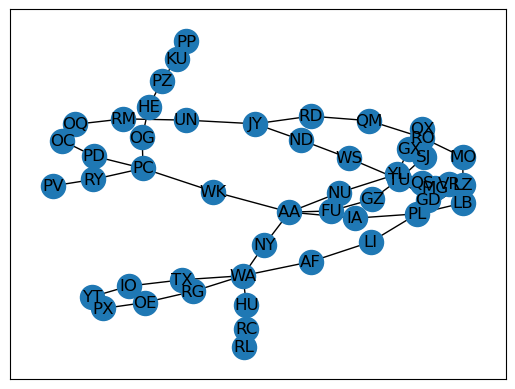

In [66]:
import networkx as nx
import numpy as np
from itertools import permutations
from math import factorial

G = nx.Graph()

input = []
with open('input.txt', 'r') as f:
    input = f.read().splitlines()

useful = set()
for line in input:
    words = line.split()
    name = words[1]
    rate = int(words[4].split('=')[1][:-1])
    leads_to = [w.replace(',', '') for w in words[9:]]
    G.add_node(name, rate=rate)
    for dest in leads_to:
        G.add_edge(name, dest)
    if rate > 0:
        useful.add(name)

dists = nx.floyd_warshall(G)
dist_matrix = nx.floyd_warshall_numpy(G)

print(len(useful), factorial(len(useful)))
u = list(zip([x for x in useful], [G.nodes[x]['rate'] for x in useful]))
u.sort(key=lambda x: x[1], reverse=True)
print(u)
nx.draw_networkx(G)

In [117]:
print(sorted(useful))
init_cycle = ['AA'] + [x[0] for x in u] + list(set(G.nodes).difference(useful.union(['AA']))) + ['AA']
my_satsp = lambda G, wt: nx.approximation.simulated_annealing_tsp(G, init_cycle=init_cycle, weight='rate')
cycle = nx.approximation.traveling_salesman_problem(G, method=my_satsp)
cumsum = 30 - np.cumsum(np.array([dists[x][y] for x, y in zip(cycle[:-1], cycle[1:])]))
rate = np.array([G.nodes[x]['rate'] for x in cycle])
release = int(np.dot(rate[cumsum > 0], cumsum[cumsum > 0]))

['IO', 'JY', 'OC', 'OE', 'PC', 'PL', 'PP', 'PV', 'PZ', 'RL', 'RM', 'RO', 'TU', 'WA', 'YL']


IndexError: boolean index did not match indexed array along dimension 0; dimension is 291 but corresponding boolean dimension is 290

In [55]:
#%%timeit -r 1
best_path = ()
best_release = 0
for i, path in enumerate(permutations(useful)):
    rates = np.array([G.nodes[x]['rate'] for x in path])
    costs = np.array([dists[x][y] for x, y in zip(('AA',) + path[:-1], path)])
    cumsum = 30 - np.cumsum(costs + 1)
    release = int(np.dot(rates[cumsum > 0], cumsum[cumsum > 0]))
    if release > best_release:
        best_release = release
        best_path = path
    if i > 100000:
        break

print(best_path, best_release)

('JY', 'WA', 'PC', 'OC', 'TU', 'OE', 'PV', 'PL', 'IO', 'PP', 'RO', 'RM', 'YL', 'PZ', 'RL') 514
